In [2]:
import pandas as pd
iris=pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv')
iris.head(3)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa


# 예제 데이터 산점도

In [6]:
import seaborn as sns
df = iris.iloc[:, 1:5]
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


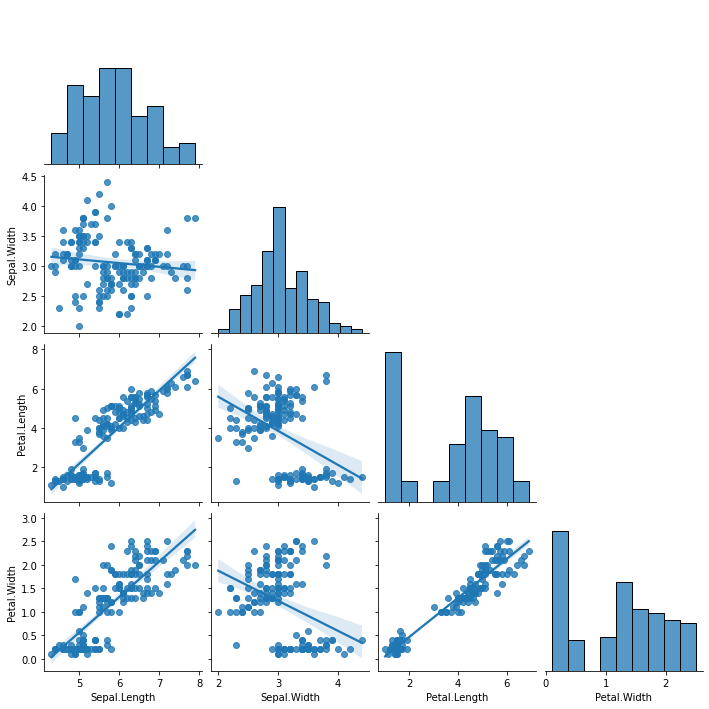

In [7]:
ax=sns.pairplot(df,kind="reg",corner=True,diag_kind="hist")

In [9]:
import scipy.stats as stats
data = iris['Sepal.Length']
stats.shapiro(data), stats.anderson(data, 'norm')
#꽃잎 길이 : 유의확률 1%로 귀무가설 기각 - 정규분포 따르지 않음

((0.9760897755622864, 0.01017984002828598),
 AndersonResult(statistic=0.8891994860134105, critical_values=array([0.562, 0.64 , 0.767, 0.895, 1.065]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])))

In [13]:
import scipy.stats as stats
import numpy as np
data = iris['Petal.Width']
data
stats.shapiro(np.sqrt(data)), stats.anderson(np.sqrt(data), 'norm')
# 꽃받침 조각 길이 : 귀무가설 기각 - 정규분포 따르지 않음
# 꽃잎 넓이 : 귀무가설 기각 - 정규분포 따르지 않음
# 꽃받침 조각 넓이 : 귀무가설 채택 - 정규분포 따름

((0.8702569007873535, 3.7821873410948115e-10),
 AndersonResult(statistic=7.743915248770833, critical_values=array([0.562, 0.64 , 0.767, 0.895, 1.065]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])))

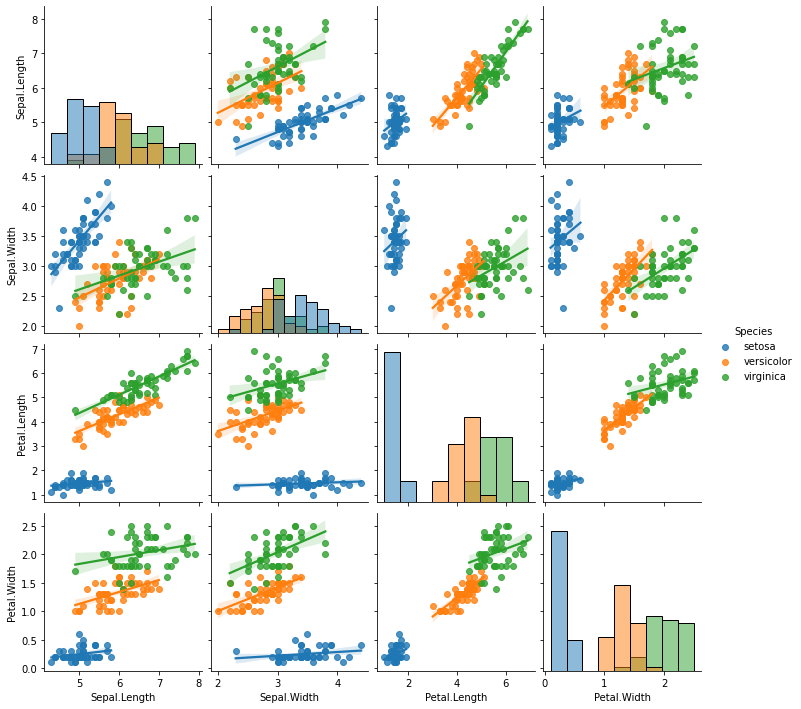

In [14]:
import seaborn as sns
df = iris.iloc[:, 1:6]
ax = sns.pairplot(df, hue = 'Species', kind="reg", diag_kind="hist")

# 피어슨 상관계수

In [16]:
df = iris.iloc[:, 1:5]
df.corr(method='pearson') #default

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


# 스피어맨 Spearman 순위 상관계수

In [17]:
df = iris.iloc[:, 1:5]
df.corr(method = 'spearman')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.166778,0.881898,0.834289
Sepal.Width,-0.166778,1.000000,-0.309635,-0.289032
Petal.Length,0.881898,-0.309635,1.000000,0.937667
Petal.Width,0.834289,-0.289032,0.937667,1.000000


# Kendall Tau 순위 상관계수

In [18]:
df = iris.iloc[:, 1:5]
df.corr(method = 'kendall')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.076997,0.718516,0.655309
Sepal.Width,-0.076997,1.000000,-0.185994,-0.157126
Petal.Length,0.718516,-0.185994,1.000000,0.806891
Petal.Width,0.655309,-0.157126,0.806891,1.000000


In [19]:
df = iris.iloc[:, 1:5]
df_cor=df.corr(method='pearson') #default
type(df_cor), df_cor.columns, df_cor.index

(pandas.core.frame.DataFrame,
 Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], dtype='object'),
 Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], dtype='object'))

In [21]:
# 집단 간 측정변수 상관계수 구하기
df = iris.iloc[:, 1:6]
df_cor=df.groupby('Species').corr()
df_cor.style.background_gradient(cmap='coolwarm').set_precision(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


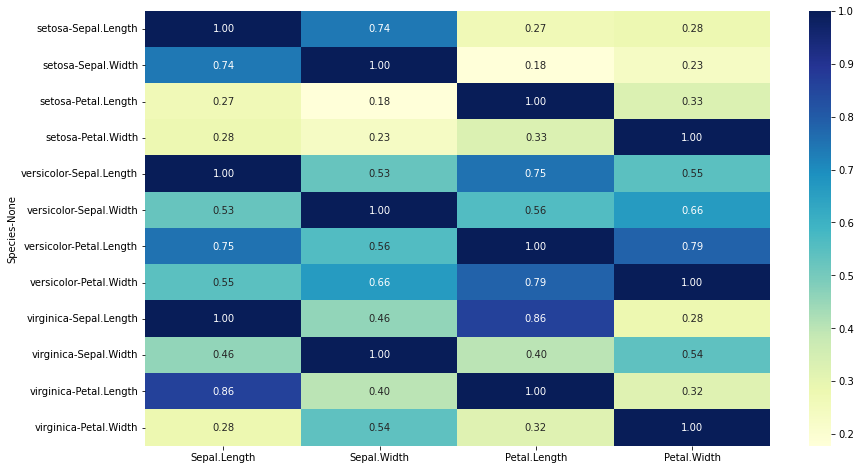

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 8)
sn.heatmap(df_cor,annot=True, fmt=".2f", cmap="YlGnBu")
plt.show()

# 상관계수 추론

In [30]:
# 1집단 상관계수 유의성 검정
import scipy.stats as st
stats.pearsonr(iris['Petal.Length'], iris['Petal.Width'])
# 꽃잎 길이와 넓이 상관계수 0.96(양의 상관관계), 매우 유의함 (p<0.001)

(0.962865431402796, 4.6750039073285846e-86)

In [32]:
stats.pearsonr(iris['Sepal.Length'], iris['Sepal.Width'])
# 꽃받침 조각 길이와 넓이 상관계수 -0.11(음의 상관관계), 유의하지 않음 (p=0.15)

(-0.11756978413300206, 0.15189826071144766)

In [33]:
# 회귀분석
from scipy import stats
stats.linregress(iris['Petal.Length'], iris['Petal.Width'])

LinregressResult(slope=0.41575541635241114, intercept=-0.36307552131902776, rvalue=0.9628654314027963, pvalue=4.6750039073255014e-86, stderr=0.009582435790766206)

In [35]:
import statsmodels.api as sm
model=sm.OLS(iris['Petal.Width'],sm.add_constant(iris['Petal.Length']))
results=model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Petal.Width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Sun, 29 May 2022   Prob (F-statistic):           4.68e-86
Time:                        15:01:43   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3631      0.040     -9.131      0.000      -0.442      -0.285
Petal.Length     0.4158      0.010     43.387      0.000       0.397       0.435
==============================================================================
Omnibus:                        5.765   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.555
Skew:                           0.359   Prob(JB):                       0.0622
Kurtosis:                       3.611   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# 집단 간 측정변수 상관계수 구하기
from matplotlib import pyplot as pyplot
import plotly.express as px
fig=px.scatter(iris, y='Petal.Width', x='Petal.Length',
               color='Species', marginal_x='box', 
               marginal_y='histogram', trendline='ols')
fig.show()

In [38]:
import pandas as pd
iris=pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv')
iris.iloc[:,[1,3]].corr()

,Sepal.Length,Petal.Length
Sepal.Length,1.000000,0.871754
Petal.Length,0.871754,1.000000


In [43]:
import numpy as np
import scipy.stats as st
n=iris.shape[0]
rho=0.8
r=0.871754
ts=(0.5*np.log((1+r)/(1-r))-0.5*np.log((1+rho)/(1-rho)))/np.sqrt(1/(n-3))
p_value=(1-st.norm.cdf(abs(ts),0,1))*2
ts,p_value
#귀무가설 기각, 피셔 분꽃의 경우 꽃받침, 꽆잎 길이 상관계수는 0.87로 한국산 분꽃보다 상관계수가 유의하게 낮다.

(2.930798464036547, 0.0033809204220280886)

In [44]:
df=iris.iloc[:,[1,3,5]]
df.groupby('Species').corr()
iris['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [47]:
# 문제 : 꽃받침(sepal) 길이와 꽃잎(petal) 길이의 상관계수는 (versicolor, virginica) 품종간 동일한가?
import numpy as np
import scipy.stats as st
n1=50
n2=50
r1=0.754049
r2=0.864225
ts=(0.5*np.log((1+r1)/(1-r1))-0.5*np.log((1+r2)/(1-r2)))/np.sqrt(1/(n1-3)+1/(n2-3))
p_value=(1-st.norm.cdf(abs(ts),0,1))*2
ts,p_value
# 유의확률이 11.2%로 귀무가설을 기각하지 못한다. (versicolor, virginica) 품종간상관계수의 차이는 유의하지 않다.

(-1.5877407387688913, 0.11234497687180856)

# 회귀분석

## 미국 도시 사회지표 (사망률지수 mortality index : Y)

In [ ]:
import pandas as pd
smsa=pd.read_csv('http://203.247.53.31/Stat_Notes/example_data/SMSA_USA.csv')
smsa.info()

KeyboardInterrupt: ignored

In [ ]:
# 미국 도시 사회지표_사망률 지수 상관계수 계산
df=smsa.iloc[:,1:15]
df_cor=df.corr()
df_cor